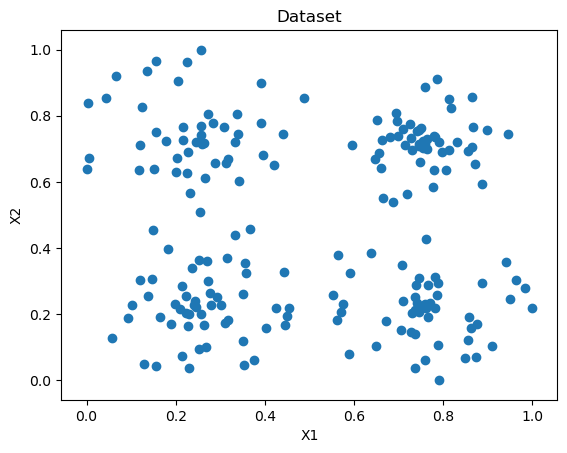

In [39]:
import numpy as np
import matplotlib.pyplot as plt

""" Making a dataset """
def random_around(center=(0, 0), max_r=0, size=1):
    theta = np.linspace(0, 2 * np.pi, size)
    radius = np.random.uniform(low=0, high=max_r, size=(size))

    x = radius * np.cos(theta) + center[0]
    y = radius * np.sin(theta) + center[1]

    return x, y

# Create the dataset
np.random.seed(42)  # Set a seed for reproducibility

# Generate four clusters with different centers, radii, and sizes
cluster1 = random_around(center=(1,1), max_r=0.8, size=50)
cluster2 = random_around(center=(1,-1), max_r=1, size=50)
cluster3 = random_around(center=(-1,1), max_r=1.2, size=50)
cluster4 = random_around(center=(-1,-1), max_r=0.9, size=50)

# Concatenate the clusters into a single dataset
dataset = np.hstack([cluster1, cluster2, cluster3, cluster4]).T

def normalize(x):
    in_min = np.min(x, axis=0)
    in_max = np.max(x, axis=0)
    out_min = 0
    out_max = 1

    return (x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min

dataset = normalize(dataset)

# Visualize the dataset
plt.scatter(dataset[:, 0], dataset[:, 1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Dataset')
plt.show()

In [40]:
# step 0
def init(n_clusters=1, n_features=1, n_points=1):
    cluster_centroids = np.random.uniform(low=0, high=1, size=(n_clusters, n_features))
    clusters = [[] for _ in range(n_clusters)]

    return cluster_centroids, clusters

# step 1
def find_nearest(cluster_centroids, clusters, points):
    for pt_index, pt in enumerate(points):
        dists = []

        for center_index, center in enumerate(cluster_centroids):
            dist_vec = center - pt
            dist = np.linalg.norm(dist_vec)
            dists.append(dist)
        
        nearest_center = dists.index(min(dists))
        clusters[nearest_center].append(pt)

    return clusters

def adjust_centroids(clusters, cluster_centroids):
    n_features = len(clusters[0][0])  # Get the number of features

    for cluster_index, cluster in enumerate(clusters):
        # Extract coordinates for each feature
        coordinates = [[] for _ in range(n_features)]
        for point in cluster:
            for i, coord in enumerate(point):
                coordinates[i].append(coord)

        

In [41]:
def get_visuals(cluster_centroids, clusters):
    for cluster_index, cluster in enumerate(clusters):
        x_values = [point[0] for point in cluster]
        y_values = [point[1] for point in cluster]
        plt.scatter(x_values, y_values)
        
    # Plot cluster centroids
    plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], marker='x', color='red')
    
    plt.show()


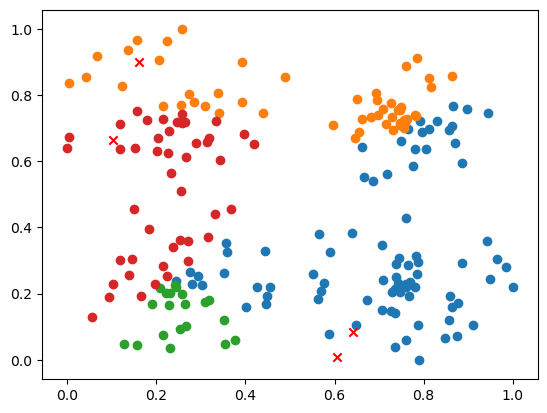

In [42]:
if __name__ == "__main__":
    cluster_centroids, clusters = init(n_clusters=4, n_features=2, n_points=dataset.shape[0])
    clusters = find_nearest(cluster_centroids, clusters, dataset)
    
    get_visuals(cluster_centroids, clusters)

    # loop

